<a href="https://colab.research.google.com/github/sabill/dphi-boothcamp-ml/blob/main/Assignment_1_Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn==0.23.1
!pip install imblearn==0.4.3

     |████████████████████████████████| 6.9MB 8.9MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


ERROR: Could not find a version that satisfies the requirement imblearn==0.4.3 (from versions: 0.0)
ERROR: No matching distribution found for imblearn==0.4.3


##Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

##Dataset

In [2]:
insurance_data = pd.read_csv("https://github.com/dphi-official/Datasets/blob/master/travel_insurance/Training_set_label.csv?raw=true")

In [3]:
insurance_data.Claim.value_counts()

0    47552
1      708
Name: Claim, dtype: int64

In [4]:
#@title
insurance_data.isna().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  34361
Age                         0
Claim                       0
dtype: int64

23.74060735686045


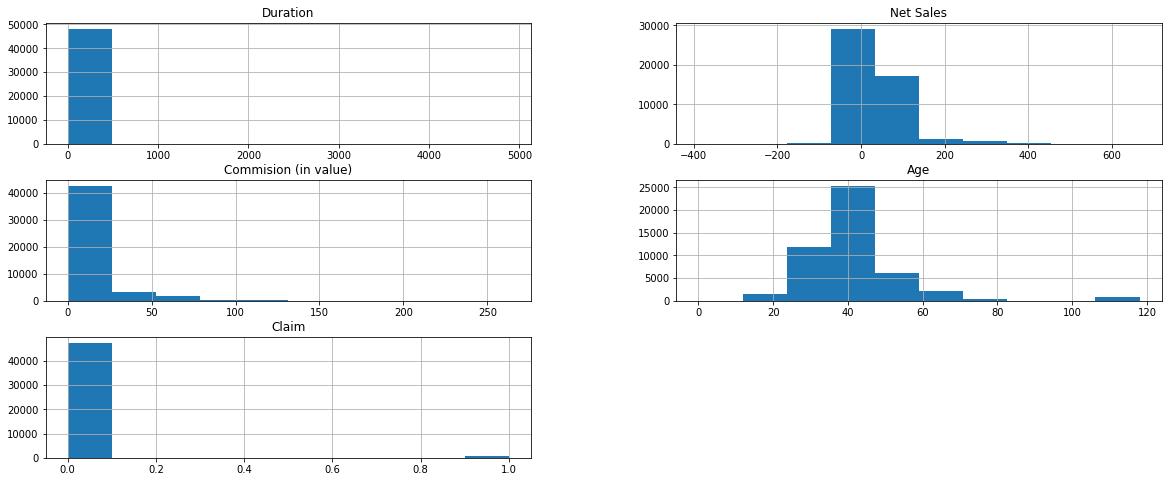

In [ ]:
print(insurance_data.Duration.skew())

insurance_data.hist(figsize=(20,8))
plt.show()

In [ ]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48260 entries, 0 to 48259
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                48260 non-null  object 
 1   Agency Type           48260 non-null  object 
 2   Distribution Channel  48260 non-null  object 
 3   Product Name          48260 non-null  object 
 4   Duration              48260 non-null  int64  
 5   Destination           48260 non-null  object 
 6   Net Sales             48260 non-null  float64
 7   Commision (in value)  48260 non-null  float64
 8   Gender                13899 non-null  object 
 9   Age                   48260 non-null  int64  
 10  Claim                 48260 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 4.1+ MB


In [ ]:
sum(n<0 for n in insurance_data.Duration)

3

In [ ]:
sum(n<0 for n in insurance_data['Net Sales'])

522

In [ ]:
sum(n<0 for n in insurance_data['Commision (in value)'])

0

In [ ]:
sum(n<0 for n in insurance_data.Age)

0

In [ ]:
sum(n<0 for n in insurance_data.Claim)

0

In [ ]:
sample1 = insurance_data[insurance_data.Claim == 1]
print(sample1.describe())
sample1.head()

         Duration   Net Sales  Commision (in value)         Age  Claim
count  708.000000  708.000000            708.000000  708.000000  708.0
mean   112.319209   95.595579             25.780749   38.731638    1.0
std    142.015956   93.880729             31.450015   14.713146    0.0
min      2.000000  -10.000000              0.000000   14.000000    1.0
25%     16.000000   29.500000              4.000000   30.000000    1.0
50%     38.500000   53.500000             13.000000   36.000000    1.0
75%    121.250000  127.000000             46.960000   44.000000    1.0
max    419.000000  507.000000            208.160000  118.000000    1.0


,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
20,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,252.85,63.21,M,52,1
45,EPX,Travel Agency,Online,2 way Comprehensive Plan,43,VIET NAM,20.00,0.00,NaN,36,1
58,C2B,Airlines,Online,Bronze Plan,34,SINGAPORE,39.00,9.75,F,64,1
152,EPX,Travel Agency,Online,2 way Comprehensive Plan,201,NEPAL,37.00,0.00,NaN,36,1
323,C2B,Airlines,Online,Bronze Plan,11,SINGAPORE,33.50,8.38,F,25,1


In [ ]:
sample2 = sample1[ sample1.Gender == 'M']
print(sample2.describe())
sample2.head()

         Duration   Net Sales  Commision (in value)         Age  Claim
count  228.000000  228.000000            228.000000  228.000000  228.0
mean   149.135965  122.351096             33.615965   38.824561    1.0
std    163.221840  110.685906             34.081251   14.280232    0.0
min      2.000000   13.500000              0.000000   14.000000    1.0
25%     13.000000   30.000000              8.380000   30.000000    1.0
50%     41.000000   67.800000             17.775000   35.500000    1.0
75%    365.000000  216.000000             54.000000   45.000000    1.0
max    416.000000  507.000000            208.160000  118.000000    1.0


,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
20,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,252.85,63.21,M,52,1
657,C2B,Airlines,Online,Silver Plan,21,SINGAPORE,27.00,6.75,M,72,1
809,C2B,Airlines,Online,Annual Silver Plan,367,SINGAPORE,216.00,54.00,M,48,1
865,JWT,Airlines,Online,Value Plan,81,INDIA,124.00,49.60,M,118,1
874,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,252.85,63.21,M,51,1


In [ ]:
sample3 = sample1[ sample1.Gender == 'F']
print(sample3.describe())
sample3.head()

         Duration   Net Sales  Commision (in value)         Age  Claim
count  255.000000  255.000000            255.000000  255.000000  255.0
mean   135.066667  109.032745             30.285020   39.101961    1.0
std    158.094010   99.971485             31.353927   16.219623    0.0
min      2.000000   13.500000              0.000000   16.000000    1.0
25%     16.000000   29.500000              8.380000   28.500000    1.0
50%     36.000000   60.000000             15.750000   35.000000    1.0
75%    365.000000  216.000000             54.000000   46.000000    1.0
max    419.000000  399.600000            208.000000  118.000000    1.0


,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
58,C2B,Airlines,Online,Bronze Plan,34,SINGAPORE,39.0,9.75,F,64,1
323,C2B,Airlines,Online,Bronze Plan,11,SINGAPORE,33.5,8.38,F,25,1
450,C2B,Airlines,Online,Gold Plan,20,SINGAPORE,60.0,15.00,F,75,1
791,C2B,Airlines,Online,Silver Plan,29,SINGAPORE,27.0,6.75,F,33,1
872,C2B,Airlines,Online,Bronze Plan,18,SINGAPORE,34.5,8.63,F,30,1


In [4]:
insurance_data.fillna('Not Specified', inplace=True)
insurance_data.isna().sum()

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Gender                  0
Age                     0
Claim                   0
dtype: int64

In [5]:
#Drop 'Distribution Channel', 'Destination' and 'Agency Type'
data_3 = insurance_data.drop(columns = ['Distribution Channel', 'Destination', 'Agency Type'], axis=1)
data_3.head()

,Agency,Product Name,Duration,Net Sales,Commision (in value),Gender,Age,Claim
0,CWT,Rental Vehicle Excess Insurance,61,19.8,11.88,Not Specified,29,0
1,EPX,Cancellation Plan,93,63.0,0.00,Not Specified,36,0
2,EPX,2 way Comprehensive Plan,22,22.0,0.00,Not Specified,25,0
3,C2B,Silver Plan,14,54.5,13.63,M,24,0
4,EPX,Cancellation Plan,90,10.0,0.00,Not Specified,23,0


In [6]:
data_3.isna().sum()

Agency                  0
Product Name            0
Duration                0
Net Sales               0
Commision (in value)    0
Gender                  0
Age                     0
Claim                   0
dtype: int64

In [7]:
#Perform one hot encoding for 'Agency','Gender','Product Name' using sklearn
# print('Unique value in column Agency:')
# print(data_3.Agency.unique(), '\n')

# print('Unique value in column Gender:')
# print(data_3.Gender.unique(), '\n')

# print('Unique value in column Product Name:')
# print(data_3['Product Name'].unique(), '\n')
ohe = OneHotEncoder(handle_unknown='ignore')
ohe_df = pd.DataFrame(ohe.fit_transform(data_3[['Agency','Gender','Product Name']]).toarray())
ohe_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
data_3 = data_3.join(ohe_df)
data_3.head()

,Agency,Product Name,Duration,Net Sales,Commision (in value),Gender,Age,Claim,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
0,CWT,Rental Vehicle Excess Insurance,61,19.8,11.88,Not Specified,29,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,EPX,Cancellation Plan,93,63.0,0.00,Not Specified,36,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,EPX,2 way Comprehensive Plan,22,22.0,0.00,Not Specified,25,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,C2B,Silver Plan,14,54.5,13.63,M,24,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,EPX,Cancellation Plan,90,10.0,0.00,Not Specified,23,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
ohe.categories_

[array(['ADM', 'ART', 'C2B', 'CBH', 'CCR', 'CSR', 'CWT', 'EPX', 'JWT',
        'JZI', 'KML', 'LWC', 'RAB', 'SSI', 'TST', 'TTW'], dtype=object),
 array(['F', 'M', 'Not Specified'], dtype=object),
 array(['1 way Comprehensive Plan', '2 way Comprehensive Plan',
        '24 Protect', 'Annual Gold Plan', 'Annual Silver Plan',
        'Annual Travel Protect Gold', 'Annual Travel Protect Platinum',
        'Annual Travel Protect Silver', 'Basic Plan', 'Bronze Plan',
        'Cancellation Plan', 'Child Comprehensive Plan',
        'Comprehensive Plan', 'Gold Plan', 'Individual Comprehensive Plan',
        'Premier Plan', 'Rental Vehicle Excess Insurance', 'Silver Plan',
        'Single Trip Travel Protect Gold',
        'Single Trip Travel Protect Platinum',
        'Single Trip Travel Protect Silver',
        'Spouse or Parents Comprehensive Plan', 'Ticket Protector',
        'Travel Cruise Protect', 'Travel Cruise Protect Family',
        'Value Plan'], dtype=object)]

In [10]:
# creating initial dataframe
#data_3.rename(columns={'Agency':'Agency_type','Gender':'Gender_type','Product Name':'Product_Name_type'}, inplace=True)
# # generate binary values using get_dummies
# dum_df = pd.get_dummies(bridge_df, columns=["Bridge_Types"], prefix=["Type_is"] )
# # merge with main df bridge_df on key values
# bridge_df = bridge_df.join(dum_df)
# bridge_df

In [11]:
x = data_3.drop(columns=['Agency','Gender','Product Name', 'Claim'], axis='columns')
x.head()

,Duration,Net Sales,Commision (in value),Age,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
0,61,19.8,11.88,29,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,93,63.0,0.00,36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,22,22.0,0.00,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14,54.5,13.63,24,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,90,10.0,0.00,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
y = data_3.Claim
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Claim, dtype: int64

In [14]:
#Split the data into training and test set with test_size = 0.3 and random_state = 101
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101, stratify=y)

In [ ]:
#!pip install imbalanced-learn

In [15]:
# use smote to equalize the classes on training set splitted in
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=22)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Before OverSampling, counts of label '1': 496
Before OverSampling, counts of label '0': 33286 



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (66572, 49)
After OverSampling, the shape of train_y: (66572,) 

After OverSampling, counts of label '1': 33286
After OverSampling, counts of label '0': 33286


In [16]:
y_train_res

array([0, 0, 0, ..., 1, 1, 1])

In [19]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=1)
model.fit(x_train_res, y_train_res)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [30]:
#score = model.score(x_test, y_test)

from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix 

y_train_hat = model.predict(x_train_res)
y_train_hat_probs = model.predict_proba(x_train_res)[:,1]
train_accuracy = accuracy_score(y_train_res, y_train_hat)*100
train_auc_roc = roc_auc_score(y_train_res, y_train_hat_probs)*100
print('Confusion matrix:\n', confusion_matrix(y_train_res, y_train_hat))
print('Training accuracy: %.4f %%' % train_accuracy)
print('Training AUC: %.4f %%' % train_auc_roc)
print('Training F1 score:%.4f %%' % (f1_score(y_train_res, y_train_hat)*100))

Confusion matrix:
 [[27490  5796]
 [ 9483 23803]]
Training accuracy: 77.0489 %
Training AUC: 84.0344 %
Training F1 score:75.7033 %


In [24]:
from sklearn.metrics import f1_score
f1_score(y_train_res, y_train_hat)

0.7570326786992129

In [31]:
#Test data on logistic regression
y_test_hat = model.predict(x_test)
y_test_hat_probs = model.predict_proba(x_test)[:,1]
test_accuracy = accuracy_score(y_test, y_test_hat)*100
test_auc_roc = roc_auc_score(y_test, y_test_hat_probs)*100
print('Confusion matrix:\n', confusion_matrix(y_test, y_test_hat))
print('Test accuracy: %.4f %%' % test_accuracy)
print('Test AUC: %.4f %%' % test_auc_roc)
print('Test F1 score:%.4f %%' % (f1_score(y_test, y_test_hat)*100))

Confusion matrix:
 [[11760  2506]
 [   75   137]]
Test accuracy: 82.1730 %
Test AUC: 81.6644 %
Test F1 score:9.5972 %


In [32]:
#Build a Decision Tree model with random_state = 1
from sklearn import tree

model2 = tree.DecisionTreeClassifier(random_state=1)
model2 = model2.fit(x_train_res, y_train_res)

y_train_hat2 = model2.predict(x_train_res)
y_train_hat_probs2 = model2.predict_proba(x_train_res)[:,1]
train_accuracy2 = accuracy_score(y_train_res, y_train_hat2)*100
train_auc_roc2 = roc_auc_score(y_train_res, y_train_hat_probs2)*100
print('Confusion matrix:\n', confusion_matrix(y_train_res, y_train_hat2))
print('Training accuracy: %.4f %%' % train_accuracy2)
print('Training AUC: %.4f %%' % train_auc_roc2)
print('Training F1 score:%.4f %%' % (f1_score(y_train_res, y_train_hat2)*100))

Confusion matrix:
 [[33284     2]
 [   81 33205]]
Training accuracy: 99.8753 %
Training AUC: 99.9996 %
Training F1 score:99.8752 %


In [33]:
#Test data on decision tree
y_test_hat2 = model2.predict(x_test)
y_test_hat_probs2 = model2.predict_proba(x_test)[:,1]
test_accuracy2 = accuracy_score(y_test, y_test_hat2)*100
test_auc_roc2 = roc_auc_score(y_test, y_test_hat_probs2)*100
print('Confusion matrix:\n', confusion_matrix(y_test, y_test_hat2))
print('Test accuracy: %.4f %%' % test_accuracy2)
print('Test AUC: %.4f %%' % test_auc_roc2)
print('Test F1 score:%.4f %%' % (f1_score(y_test, y_test_hat2)*100))

Confusion matrix:
 [[13922   344]
 [  199    13]]
Test accuracy: 96.2495 %
Test AUC: 52.7380 %
Test F1 score:4.5694 %


In [34]:
#Build a Random Forest model with random_state = 1
from sklearn.ensemble import RandomForestClassifier

model3 =RandomForestClassifier(random_state=1)
model3.fit(x_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [45]:
print('Random Forest Classifier')

y_train_hat3 = model3.predict(x_train_res)
y_train_hat_probs3 = model3.predict_proba(x_train_res)[:,1]
train_accuracy3 = accuracy_score(y_train_res, y_train_hat3)*100
train_auc_roc3 = roc_auc_score(y_train_res, y_train_hat_probs3)*100
print('Confusion matrix:\n', confusion_matrix(y_train_res, y_train_hat3))
print('Training accuracy: %.4f %%' % train_accuracy3)
print('Training AUC: %.4f %%' % train_auc_roc3)
print('Training F1 score:%.4f %%' % (f1_score(y_train_res, y_train_hat3)*100))

y_test_hat3 = model3.predict(x_test)
y_test_hat_probs3 = model3.predict_proba(x_test)[:,1]
test_accuracy3 = accuracy_score(y_test, y_test_hat3)*100
test_auc_roc3 = roc_auc_score(y_test, y_test_hat_probs3)*100
print('Confusion matrix:\n', confusion_matrix(y_test, y_test_hat3))
print('Test accuracy: %.4f %%' % test_accuracy3)
print('Test AUC: %.4f %%' % test_auc_roc3)
print('Test F1 score:%.4f %%' % (f1_score(y_test, y_test_hat3)*100))

print('\n')
print(classification_report(y_test,rfc.predict(X_test)))

Random Forest Classifier
Confusion matrix:
 [[33270    16]
 [   68 33218]]
Training accuracy: 99.8738 %
Training AUC: 99.9978 %
Training F1 score:99.8737 %
Confusion matrix:
 [[14055   211]
 [  197    15]]
Test accuracy: 97.1819 %
Test AUC: 73.2043 %
Test F1 score:6.8493 %




NameError: ignored

In [36]:
#Use GridSearchCv
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report


In [37]:
#Use GridSearchCv for Random Forest with random_state = 1 with given parameters: (name it as grid_search_1)
rf = RandomForestClassifier(random_state=1)

grid_search_1 = {
    'bootstrap': [True],
    'max_depth': [10, 20],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [4, 6],
    'n_estimators': [100, 200],
}

clf = GridSearchCV(rf,
                   grid_search_1,
                   cv = 3,
                   n_jobs = -1,
                   verbose = 2)

clf.fit(x_train_res, y_train_res.ravel())

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  4.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                   

In [38]:
clf.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 100}

In [39]:
y_predict_clf = clf.predict(x_test)
print(y_predict_clf)
print(pd.DataFrame(y_predict_clf).value_counts())

[0 0 0 ... 0 0 0]
0    14120
1      358
dtype: int64


In [47]:
# rf1
# rf1.fit(X_train_res, y_train_res.ravel())

#F1 score
import sklearn
sklearn.metrics.f1_score(y_test, y_predict_clf)

0.11228070175438597

In [41]:
#Use GridSearchCv for Decision Tree with random_state = 1 with given parameters: (name it as grid_search_2)
dt = tree.DecisionTreeClassifier(random_state=1)

grid_search_2 = {'max_leaf_nodes': [5, 10, 15, 20],
                 'min_samples_split': [4, 6, 8, 10]}

grid_kn = GridSearchCV(dt,
                       grid_search_2,
                       cv = 3,
                       n_jobs = -1,
                       verbose = 2)

grid_kn.fit(x_train_res, y_train_res.ravel())

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    7.9s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=1, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_leaf_nodes': [5, 10, 15, 20],
                         'min_samples_split': [4, 6, 8, 10]},
       

In [42]:
grid_kn.best_params_

{'max_leaf_nodes': 20, 'min_samples_split': 4}

In [43]:
y_predict_kn = grid_kn.predict(x_test)

In [46]:
sklearn.metrics.f1_score(y_test, y_predict_kn)

0.11506140917905625

In [ ]:
# Perform feature selection using RFE
# Initialize random forest model with random_state = 1
# Initialize RFE with step = 1
# Fit the data to RFE
# Build the random forest model with: random_state=1 using the selected features by rfe

from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

random_states = 1
steps = 1


In [ ]:
# create pipeline
rfe = RFE(step = steps)
model = 
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

random_states = 1
steps = 1

rfe = RFE(estimator=RandomForestClassifier())
rfe.fit(x_train_res, y_train_res)
# transform the data
X, y = rfe.transform(x_train_res, y_train_res)

##Test to data test

In [38]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/travel_insurance/Testing_set_label.csv')

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15832 entries, 0 to 15831
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                15832 non-null  object 
 1   Agency Type           15832 non-null  object 
 2   Distribution Channel  15832 non-null  object 
 3   Product Name          15832 non-null  object 
 4   Duration              15832 non-null  int64  
 5   Destination           15832 non-null  object 
 6   Net Sales             15832 non-null  float64
 7   Commision (in value)  15832 non-null  float64
 8   Gender                4546 non-null   object 
 9   Age                   15832 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 1.2+ MB


In [ ]:
test_data.Gender.fillna('Not Specified', inplace=True)

In [ ]:
test_data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,EPX,Travel Agency,Online,Cancellation Plan,24,HONG KONG,27.0,0.0,Not Specified,36
1,EPX,Travel Agency,Online,Cancellation Plan,51,JAPAN,45.0,0.0,Not Specified,36
2,EPX,Travel Agency,Online,Cancellation Plan,52,JAPAN,21.0,0.0,Not Specified,21
3,EPX,Travel Agency,Online,Cancellation Plan,89,SINGAPORE,11.0,0.0,Not Specified,30
4,EPX,Travel Agency,Online,Cancellation Plan,5,MALAYSIA,10.0,0.0,Not Specified,33


In [ ]:
test_fix = test_data.drop(columns = ['Distribution Channel', 'Destination', 'Agency Type'], axis=1)
test_fix.head()

,Agency,Product Name,Duration,Net Sales,Commision (in value),Gender,Age
0,EPX,Cancellation Plan,24,27.0,0.0,Not Specified,36
1,EPX,Cancellation Plan,51,45.0,0.0,Not Specified,36
2,EPX,Cancellation Plan,52,21.0,0.0,Not Specified,21
3,EPX,Cancellation Plan,89,11.0,0.0,Not Specified,30
4,EPX,Cancellation Plan,5,10.0,0.0,Not Specified,33


In [ ]:
ohe = OneHotEncoder(handle_unknown='ignore')
ohe_test = pd.DataFrame(ohe.fit_transform(test_fix[['Agency','Gender','Product Name']]).toarray())
ohe_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_fix = test_fix.join(ohe_df)
test_fix.head()

,Agency,Product Name,Duration,Net Sales,Commision (in value),Gender,Age,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
0,EPX,Cancellation Plan,24,27.0,0.0,Not Specified,36,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,EPX,Cancellation Plan,51,45.0,0.0,Not Specified,36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,EPX,Cancellation Plan,52,21.0,0.0,Not Specified,21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,EPX,Cancellation Plan,89,11.0,0.0,Not Specified,30,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,EPX,Cancellation Plan,5,10.0,0.0,Not Specified,33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_fix.drop(columns=['Agency', 'Product Name', 'Gender'], inplace=True)

In [ ]:
test_fix.head()

,Duration,Net Sales,Commision (in value),Age,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
0,24,27.0,0.0,36,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,51,45.0,0.0,36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,52,21.0,0.0,21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,89,11.0,0.0,30,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,10.0,0.0,33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
predict = model.predict(test_fix)

In [ ]:
predict_file = pd.DataFrame(predict)
predict_file

,0
0,0
1,0
2,0
3,0
4,0
...,...
15827,0
15828,0
15829,0
15830,0


In [ ]:
predict_file.value_counts()

0    15832
dtype: int64

In [ ]:
predict_file.rename(columns={0: 'prediction'}, inplace=True)
predict_file

,prediction
0,0
1,0
2,0
3,0
4,0
...,...
15827,0
15828,0
15829,0
15830,0


In [ ]:
predict_file.to_csv('Travel_Insurance_Prediction.csv', index=False)